# Lecture 6 - DSAI510 Data Science

# Exploratory Data Analysis (EDA), Data Wrangling, Transformation and Visualization

- EDA is understanding the main characteristics of a dataset, often with statistics and visual methods. The purpose is to discover patterns, spot anomalies and outliers, test hypotheses, and check assumptions.

In [3]:
# Run this cell first
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Set the display option to show all rows scrolling with a slider
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', None)


# pd.options.display.max_rows = 1000
# pd.options.display.max_columns = 20

# To disable this, run the line below:
# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')

## Breast Cancer Wisconsin (Diagnostic) Data Set

Dataset link: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/

Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)<br>
b) texture (standard deviation of gray-scale values)<br>
c) perimeter<br>
d) area<br>
e) smoothness (local variation in radius lengths)<br>
f) compactness (perimeter^2 / area - 1.0)<br>
g) concavity (severity of concave portions of the contour)<br>
h) concave points (number of concave portions of the contour)<br>
i) symmetry<br>
j) fractal dimension ("coastline approximation" - 1)<br>

The mean, standard error (uncertainty of the mean) and "worst" (largest) measurement were computed for each image,
resulting in 30 features. For instance, for any record (tumor image), column 3 is Mean Radius of the tumor image, 
column 13 is Radius SE of the tumor image, column 23 is the Worst (largest) radius measured for that tumor image.
(For each image, we measure many radii since the tumors are not perfectly circular.)

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [4]:
breast = pd.read_csv('./Breast_Cancer_Wisconsin.csv')

print("Number of duplicate records in 'breast':",breast.duplicated().sum(),"\n\n"  )

breast

Number of duplicate records in 'breast': 0 




,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [5]:
# drop the Unnamed column at the end; it's caused by an extra comma after the column names in the csv file
breast.drop(columns=['Unnamed: 32'], inplace=True)

breast.diagnosis.value_counts()

# B is for benign and M is for malignant.

diagnosis
B    357
M    212
Name: count, dtype: int64

In [32]:
breast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
breast

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Feature Scaling: Standardization and Normalization of Data
Both standardization and normalization are preprocessing techniques used to scale the features in a dataset. Numerical values in different columns may be in different magnitudes or units such that one column may have numbers between 1 and 10 while another column may have numbers between 10M-20M. For some statistical and machine learning models, the data needs to be standardized or normalized before model training.

### 1. Standardization

Standardization transforms your data such that it has a mean of 0 and a standard deviation of 1. 


The formula for standardization is given by:
$$ z = \frac{x - \mu}{\sigma} $$
where:
- $ x $ is the original feature vector
- $ \mu $ is the mean of the feature vector
- $ \sigma $ is the standard deviation of the feature vector.

In [7]:
breast[['radius_mean','area_mean']].describe()

# Look at the mean value of radius_mean and area_mean: The magnitudes are different (also the units, in this case)

,radius_mean,area_mean
count,569.000000,569.000000
mean,14.127292,654.889104
std,3.524049,351.914129
min,6.981000,143.500000
25%,11.700000,420.300000
50%,13.370000,551.100000
75%,15.780000,782.700000
max,28.110000,2501.000000


array([[<Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'area_mean'}>]], dtype=object)

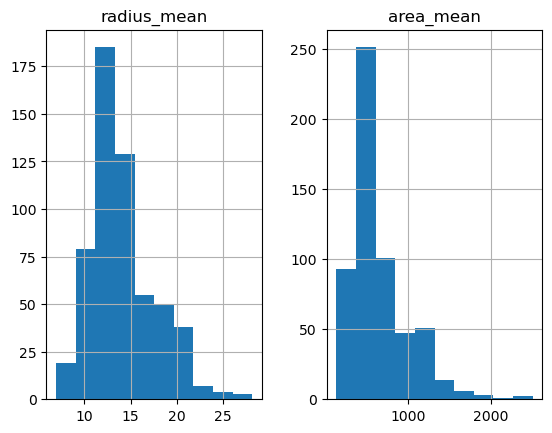

In [8]:
breast[['radius_mean','area_mean']].hist()

# They look approximately normally distributed. We can standardize them.

In [9]:
from sklearn.preprocessing import StandardScaler

data = breast[['radius_mean','area_mean']]

scaler = StandardScaler()
breast_scaled = pd.DataFrame(scaler.fit_transform(data),columns=['radius_mean','area_mean'])
breast_scaled


,radius_mean,area_mean
0,1.097064,0.984375
1,1.829821,1.908708
2,1.579888,1.558884
3,-0.768909,-0.764464
4,1.750297,1.826229
...,...,...
564,2.110995,2.343856
565,1.704854,1.723842
566,0.702284,0.577953
567,1.838341,1.735218


array([[<Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'area_mean'}>]], dtype=object)

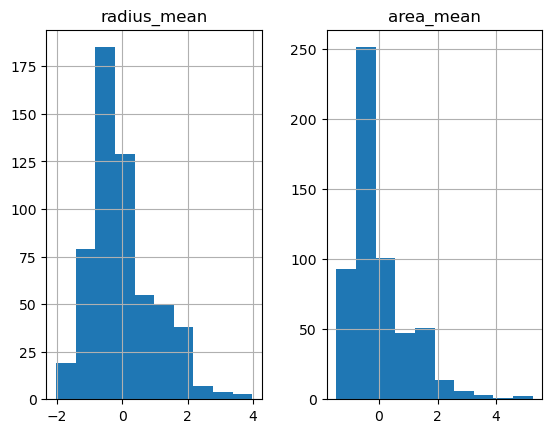

In [10]:
breast_scaled[['radius_mean','area_mean']].hist()

# Look at the scales; both now have mean=0 and std=1.

In [11]:
# Summary table
breast_scaled.describe()

,radius_mean,area_mean
count,5.690000e+02,5.690000e+02
mean,-1.373633e-16,-2.185325e-16
std,1.000880e+00,1.000880e+00
min,-2.029648e+00,-1.454443e+00
25%,-6.893853e-01,-6.671955e-01
50%,-2.150816e-01,-2.951869e-01
75%,4.693926e-01,3.635073e-01
max,3.971288e+00,5.250529e+00


In [12]:
# The summary table above shows very small numbers which are practically zero.
# Let's try to get a cleaner summary table.

# applymap() is a pandas function

breast_scaled.describe().applymap(lambda x: 0 if np.abs(x) < 1e-4 else x).round()

,radius_mean,area_mean
count,569.0,569.0
mean,0.0,0.0
std,1.0,1.0
min,-2.0,-1.0
25%,-1.0,-1.0
50%,-0.0,-0.0
75%,0.0,0.0
max,4.0,5.0


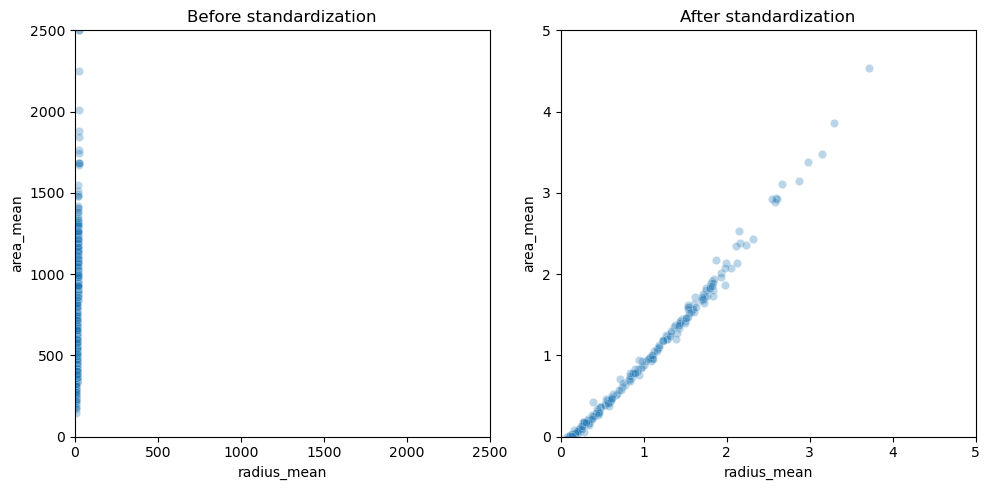

In [13]:
# Set up the figure and axes
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot data
sns.scatterplot(x='radius_mean', y='area_mean', data=breast[['radius_mean','area_mean']], ax=axs[0],alpha=0.3).set_title('Before standardization')
axs[0].set_xlim(0, 2500)
axs[0].set_ylim(0, 2500)

sns.scatterplot(x='radius_mean', y='area_mean', data=breast_scaled, ax=axs[1],alpha=0.3).set_title('After standardization')
axs[1].set_xlim(0, 5)
axs[1].set_ylim(0, 5)
    
plt.tight_layout()
plt.show()

# In the left panel, notice that the change in 'area_mean' is huge in comparison to change in 'radius_mean',
# so algorithms cannot model both variables as the scales are different.
# After standardization (right panel), both variables have the same scale.

### 2. Normalization

Normalization scales feature values to a range of [0, 1].

The formula for normalization is given by:
$$ x' = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}} $$
where:
- $ x $ is an original value
- $ x' $ is the normalized value.


array([[<Axes: title={'center': 'radius_se'}>,
        <Axes: title={'center': 'area_se'}>]], dtype=object)

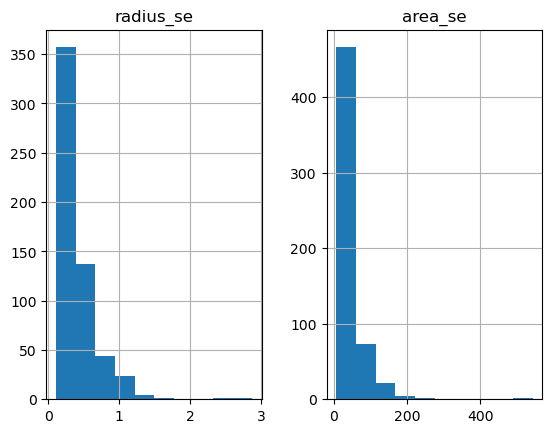

In [14]:
breast[['radius_se','area_se']].hist()

In [78]:
breast[['radius_se','area_se']].describe()

,radius_se,area_se
count,569.000000,569.000000
mean,0.405172,40.337079
std,0.277313,45.491006
min,0.111500,6.802000
25%,0.232400,17.850000
50%,0.324200,24.530000
75%,0.478900,45.190000
max,2.873000,542.200000


In [80]:
from sklearn.preprocessing import MinMaxScaler

data=breast[['radius_se','area_se']]

scalerminmax = MinMaxScaler()
breast_normalized = pd.DataFrame(scalerminmax.fit_transform(data),columns=['radius_se','area_se'])
breast_normalized

,radius_se,area_se
0,0.356147,0.273811
1,0.156437,0.125660
2,0.229622,0.162922
3,0.139091,0.038155
4,0.233822,0.163688
...,...,...
564,0.385479,0.283710
565,0.236828,0.172279
566,0.124896,0.077976
567,0.222524,0.148335


In [81]:
breast_normalized.describe()

,radius_se,area_se
count,569.000000,569.000000
mean,0.106345,0.062636
std,0.100421,0.084967
min,0.000000,0.000000
25%,0.043781,0.020635
50%,0.077023,0.033112
75%,0.133044,0.071700
max,1.000000,1.000000


You need scaling (normalization or standardization)
- With models like linear regression, logistic regression, and linear discriminant analysis.
- When using gradient descent as an optimization algorithm.
- For algorithms that rely on the magnitude or distance of the data, such as k-NN, k-Means, and SVM.
- Algorithms that are sensitive to the scale of the input features, such as neural networks.

You may not need scaling with decision tree type models (decision trees, random forests, gradient boosting trees), but still it's good practice to scale before modeling.


**Decision on which one to use:**

- Short answer: Try unscaled, normalized and standardized versions of the data and model each, see which one gives you the best model performance.
